In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report,precision_score, recall_score
from sklearn.decomposition import PCA

In [123]:
df = pd.read_csv("weatherAUS.csv")
df.drop(columns=["RISK_MM"], axis = 1, inplace=True)

In [124]:
df.shape

(142193, 23)

In [125]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

In [127]:
# Data is unbalanced
df["RainTomorrow"].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

# Data Preprocessing

### Removing Missing Values from numerical data

#### Removing null values from MinTemp, MaxTemp column by taking mean of the MinTemp, MaxTemp according to cities and fill at null values

In [128]:
numerical = df._get_numeric_data().columns
categorical = set(df.columns) - set(numerical)
loc_for_miss = df["Location"].unique().tolist()
ls = []
def removeNull(columns):
    j=0
    while j<=len(columns)-1:
        for i in range(len(loc_for_miss)):    
            #appending median values of all numerical columns wrt to cities in list
            ls.append(str(df.loc[df["Location"] == loc_for_miss[i], columns[j]].median())) #great outliers so used median

        for i in range(len(loc_for_miss)):
            #fillna values in those columns
            df.loc[df["Location"] == loc_for_miss[i], columns[j]] = df.loc[df["Location"] == loc_for_miss[i], columns[j]].fillna(ls[i])
        j+=1
        df[columns] = df[columns].astype(float)
        
removeNull(numerical)

/Users/thesarang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


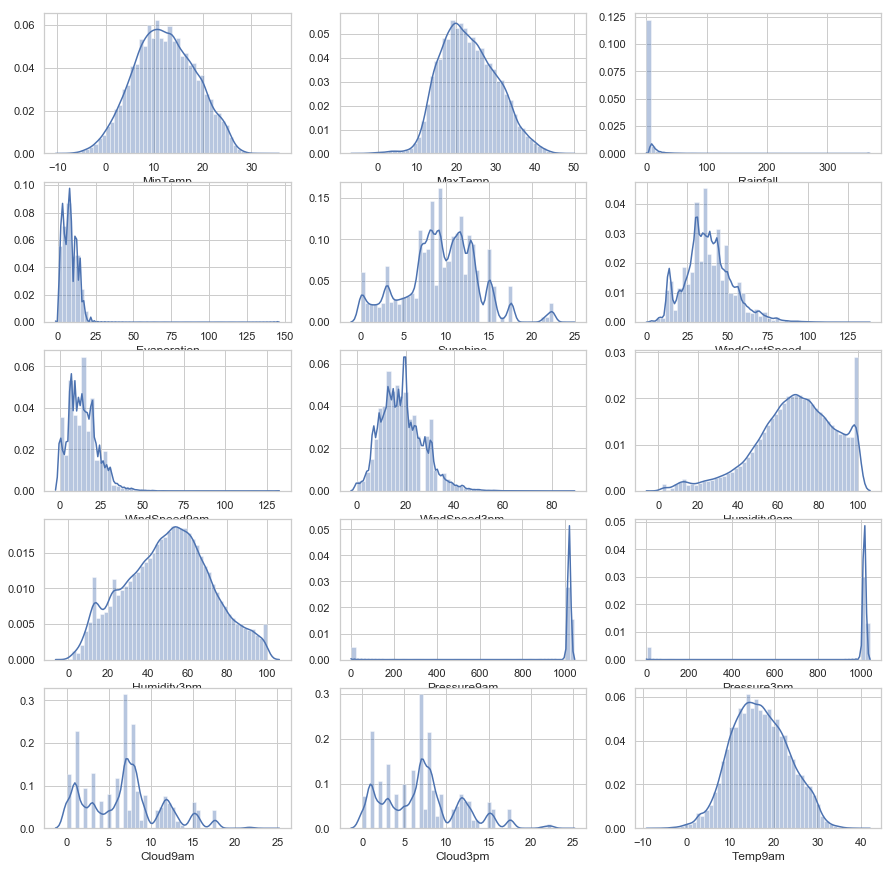

In [129]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1; 
    plt.savefig('distribution_before_removing_missing_values_from_numerical_columns.png')
    plt.show()
plotHist()

In [130]:
numerical

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [131]:
categorical

{'Date',
 'Location',
 'RainToday',
 'RainTomorrow',
 'WindDir3pm',
 'WindDir9am',
 'WindGustDir'}

## Checking outliers in numerical columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


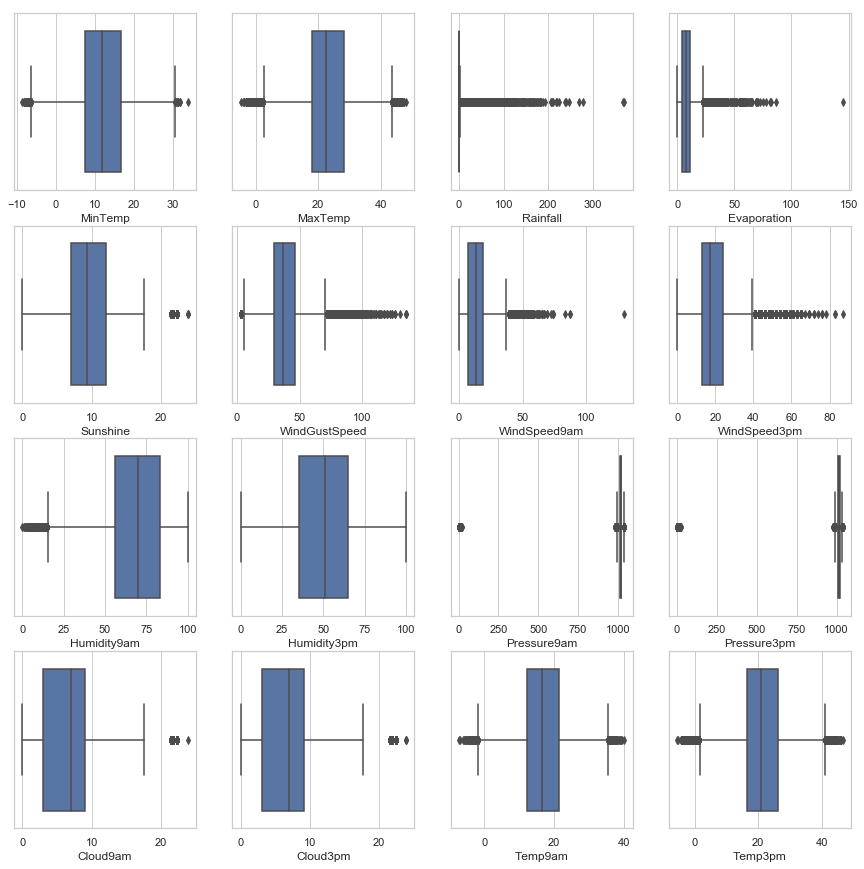

In [132]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

## Removing Outliers

In [133]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
#         print(i ,"q1", q1)
        q3 = df[numerical[i]].quantile(0.75)
#         print(i, "q3", q3)
        IQR = q3-q1
#         print(i, "IQR", IQR)
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


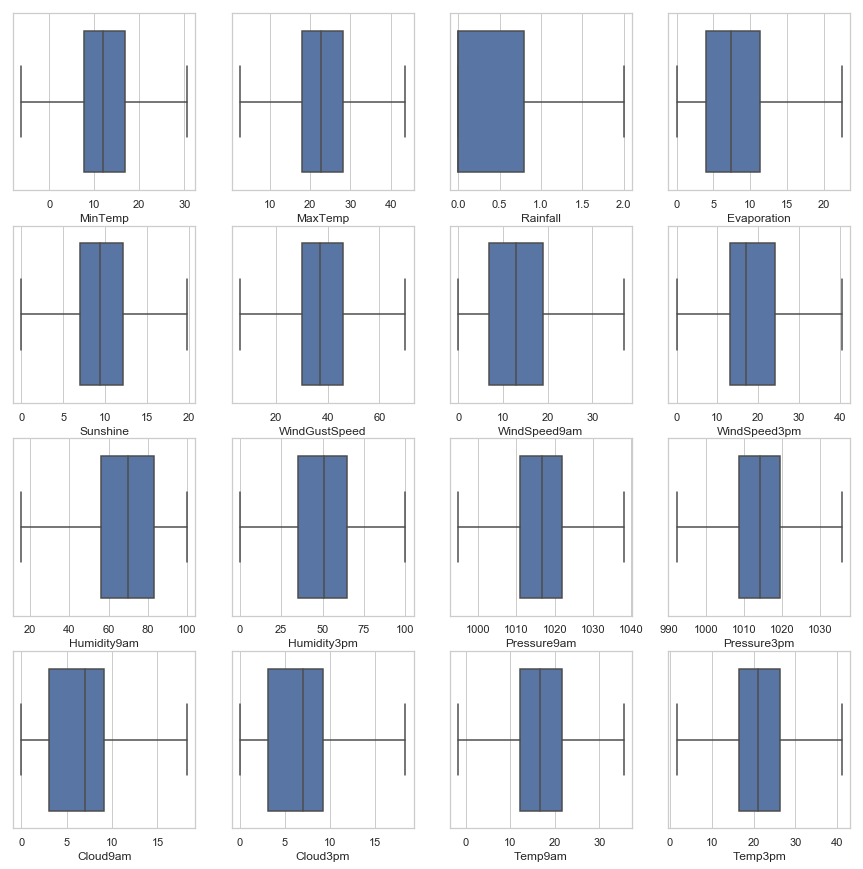

In [134]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

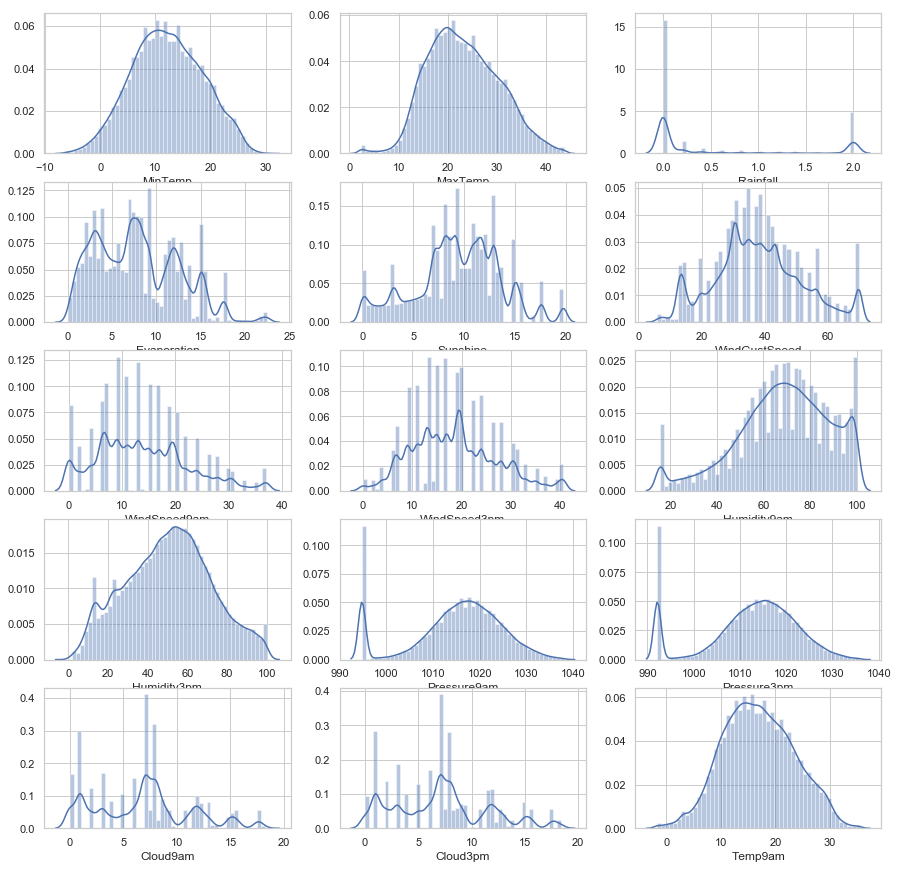

In [135]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1;
    plt.savefig('distribution_after_removing_outliers_from_numerical_columns.png')
    plt.show()
plotHist()

## Removing Missing Values from categorical data

### Check if all values of columns wrt every location are nan . If so replace them by geographically searching location near to given cities.  

### For special case of WindGustDir where some cities have mode as nan. So handling these cities saperately

In [136]:
# For WindGustDir column only
ls_WGD = []
loc_for_miss = df["Location"].unique()
for j in range(len(loc_for_miss)):
    df_allNanWGD = df.loc[df["Location"] == loc_for_miss[j]]
    if(df_allNanWGD["WindGustDir"].isnull().all()):
        ls_WGD.append(loc_for_miss[j])
            
ls_WGD
# ['Newcastle', 'Albany'] cities have all null values in only WindGustDir column so mode will null as well.
# For remaining columns, null values can be replaced by the mode values.

['Newcastle', 'Albany']

In [137]:
#first handling these cities only
# 'Newcastle' is near to "Sydnay" with mode W,
# 'Albany' is near to "Perth" with mode SW

# imputing W in Newcastle for WindGustDir column
df.loc[df["Location"] == "Newcastle", "WindGustDir"] = "W"
df.loc[df["Location"] == "Albany", "WindGustDir"] = "SW"

In [138]:
#mode in categorical varibles wrt cities
numerical = df._get_numeric_data().columns
# print("numerical features are", numerical)
# categorical = list(set(df.columns) - set(numerical))
categorical = ['RainToday', 'WindDir9am', 'WindDir3pm']
# print("categorical features are", categorical)
loc_for_miss = ['Albury','BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree','Newcastle','NorahHead','NorfolkIsland',
                'Penrith','Richmond','Sydney','SydneyAirport','WaggaWagga','Williamtown','Wollongong','Canberra',
                'Tuggeranong','MountGinini','Ballarat','Bendigo','Sale','MelbourneAirport','Melbourne','Mildura',
                'Nhil','Portland','Watsonia','Dartmoor','Brisbane','Cairns','GoldCoast','Townsville','Adelaide',
                'MountGambier','Nuriootpa','Woomera','Albany','Witchcliffe','PearceRAAF','PerthAirport','Perth',
                'SalmonGums','Walpole','Hobart','Launceston','AliceSprings','Darwin','Katherine','Uluru']
ls = []
ls_allNAN = []
def removeNull(columns):
    for j in range(len(columns)):
        ls = []
        for i in range(len(loc_for_miss)): 
            #appending mode values of all categorical columns one by one wrt to cities in the list
            ls.append(df.loc[df["Location"] == loc_for_miss[i], columns[j]].mode()[0])
#             print(columns[j], ls)
            
        for i in range(len(loc_for_miss)):
            #fillna values in those columns
            df.loc[df["Location"] == loc_for_miss[i], columns[j]] = df.loc[df["Location"] == loc_for_miss[i], columns[j]].fillna(ls[i])
        df[columns] = df[columns].astype(object)
    
removeNull(categorical)

['RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm']


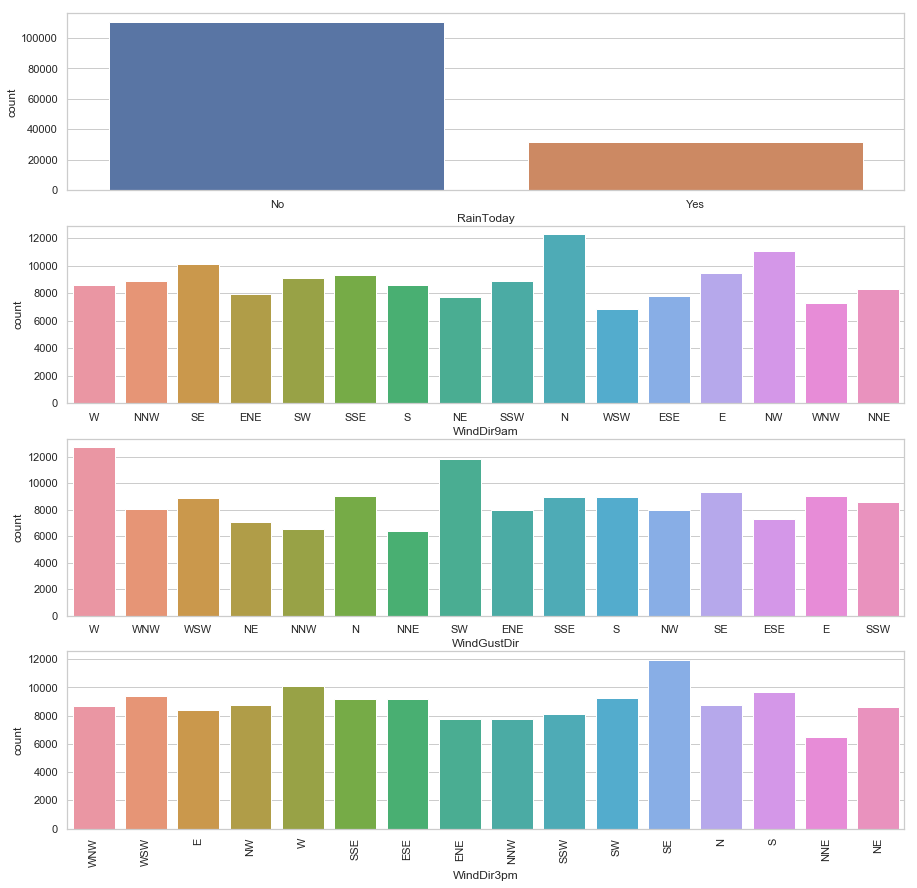

In [139]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
print(categoricalPlot)
c=0
while c<=3:
    sns.countplot(df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.savefig('distribution_after_removing_missing_values_from_categorical_columns.png')
plt.show()

## Feature Engineering

In [140]:
#Adding extra columns by splitting date column
df['Year']=[d.split('-')[0] for d in df.Date]
df['Year'].astype(float)
df['Month']=[d.split('-')[1] for d in df.Date]
df['Day']=[d.split('-')[2] for d in df.Date]
df.drop(columns=["Date"], axis=1, inplace=True)

In [141]:
#performing labelEncoding on y i.e RainTommorrow
le = LabelEncoder()
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
df.RainTomorrow.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [142]:
#performing one hot encoding on RainToday, WindGustDir, WindDir9am, WindDir3pm, Location as they are nominal 
#variables and the drop them.
#If they were ordinal, then Lable Encoding

In [143]:
df_WindGustDir = pd.get_dummies(df["WindGustDir"], prefix="1")
df_WindDir9am = pd.get_dummies(df["WindDir9am"], prefix="2")
df_WindDir3pm = pd.get_dummies(df["WindDir3pm"], prefix="3")
df_RainToday = pd.get_dummies(df["RainToday"])
location_ohe = pd.get_dummies(df["Location"])
df_new = pd.concat([df, df_WindGustDir, df_WindDir9am, df_WindDir3pm, df_RainToday, location_ohe], axis=1)
df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Location"], axis=1, inplace=True)

In [144]:
#Taking average of columns annd create new column
df_new["AveTemp"] = (df_new["MinTemp"]+df_new["MaxTemp"])/2
df_new["WindSpeed12pm"] = (df_new["WindSpeed3pm"]+df_new["WindSpeed9am"])/2
df_new["Humidity12pm"] = (df_new["Humidity3pm"]+df_new["Humidity9am"])/2
df_new["Pressure12pm"] = (df_new["Pressure3pm"]+df_new["Pressure9am"])/2
df_new["Cloud12pm"] = (df_new["Cloud3pm"]+df_new["Cloud9am"])/2
df_new["Temp12am"] = (df_new["Temp3pm"]+df_new["Temp9am"])/2

### Splitting test and train data

In [145]:
X = df_new.loc[:,df_new.columns != "RainTomorrow"]
y = df_new.loc[:,["RainTomorrow"]]

In [146]:
y.RainTomorrow.value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

In [147]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.80, random_state=2, )
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(113754, 124)
(28439, 124)
(113754, 1)
(28439, 1)


/Users/thesarang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [148]:
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# rus = RandomOverSampler(random_state = 3)
# Xtrain, ytrain = rus.fit_sample(Xtrain, ytrain)

In [149]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(ratio='minority')
# Xtrain, ytrain = smote.fit_sample(Xtrain, ytrain)
# Ensure columns are homogeneous - imblearn recasts as numpy array
# X_train_f_sm = pd.DataFrame(X_train_f_sm, columns=X_train_f.columns)

In [150]:
print(Xtrain.shape)
print(ytrain.shape)

(113754, 124)
(113754, 1)


### Performing standization

In [151]:
scaler = StandardScaler()
#fitting standardization on train data only
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

/Users/thesarang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/thesarang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/thesarang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64, object were all converted to float64 by StandardScaler.
  """


## Performing PCA

In [152]:
pca = PCA(n_components=20)
pca.fit(XtrainSTD)
XtrainPCA = pca.transform(XtrainSTD)
XtestPCA = pca.transform(XtestSTD)

## Modeling

In [153]:
rf = RandomForestClassifier(bootstrap= True, criterion='entropy', n_estimators=124, max_features="auto", random_state=0)
rf.fit(XtrainSTD, ytrain)
ypred = rf.predict(XtestSTD)
accuracy = accuracy_score(ypred, ytest)
recall = recall_score(ypred, ytest)
roc_score = roc_auc_score(ypred, ytest)
print(accuracy)
print(recall)
print(roc_score)

/Users/thesarang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8547065649284433
0.7855536115971007
0.8257909640766419


In [154]:
abc = AdaBoostClassifier()
abc.fit(XtrainSTD, ytrain)
predict = abc.predict(XtestSTD)
accuracy = accuracy_score(predict, ytest)
precision = precision_score(predict, ytest)
recall = recall_score(predict, ytest)
roc_score = roc_auc_score(predict, ytest)
print(accuracy)
print(recall)
print(roc_score)

/Users/thesarang/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8407116987235838
0.7178480720387901
0.790316105042126
